## 二、重塑和轴向旋转
* 重塑（reshape）、轴向旋转（pivot）

### 1 重塑层次化索引

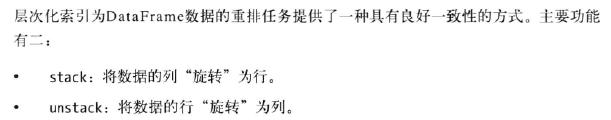

In [53]:
Image(filename="picture\Reshaping with Hierarchical Indexing.png")

In [55]:
data = DataFrame(np.arange(6).reshape((2, 3)),index=pd.Index(['Ohio', 'Colorado'], name='state'),
 columns=pd.Index(['one', 'two', 'three'], name='number'))

print data

result = data.stack() # 将列转成行，得到一个Series

print result
print result.unstack() # 重排为DataFrame
print result.unstack(0) # 默认操作最内层，传入分层级别的编号或名称即可对其进行其他级别的unstack操作
print result.unstack('state')

number    one  two  three
state                    
Ohio        0    1      2
Colorado    3    4      5
state     number
Ohio      one       0
          two       1
          three     2
Colorado  one       3
          two       4
          three     5
dtype: int32
number    one  two  three
state                    
Ohio        0    1      2
Colorado    3    4      5
state   Ohio  Colorado
number                
one        0         3
two        1         4
three      2         5
state   Ohio  Colorado
number                
one        0         3
two        1         4
three      2         5


In [56]:
s1 = Series([0, 1, 2, 3], index=['a', 'b', 'c', 'd'])
s2 = Series([4, 5, 6], index=['c', 'd', 'e'])

print s1
print s2

data2 = pd.concat([s1, s2], keys=['one', 'two'])

print data2
print data2.unstack() # 如果找不到对应的值，unsatack操作引入NaN
print data2.unstack().stack() # stack默认滤除缺失数据，因此可逆
print data2.unstack().stack(dropna=False)

a    0
b    1
c    2
d    3
dtype: int64
c    4
d    5
e    6
dtype: int64
one  a    0
     b    1
     c    2
     d    3
two  c    4
     d    5
     e    6
dtype: int64
      a   b  c  d   e
one   0   1  2  3 NaN
two NaN NaN  4  5   6
one  a    0
     b    1
     c    2
     d    3
two  c    4
     d    5
     e    6
dtype: float64
one  a     0
     b     1
     c     2
     d     3
     e   NaN
two  a   NaN
     b   NaN
     c     4
     d     5
     e     6
dtype: float64


In [57]:
df = DataFrame({'left': result, 'right': result + 5},columns=pd.Index(['left', 'right'], name='side'))

print df

print df.unstack('state') # 旋转轴的级别将会成为结果中的最低级别
print df.unstack('state').stack('side')

side             left  right
state    number             
Ohio     one        0      5
         two        1      6
         three      2      7
Colorado one        3      8
         two        4      9
         three      5     10
side   left          right         
state  Ohio Colorado  Ohio Colorado
number                             
one       0        3     5        8
two       1        4     6        9
three     2        5     7       10
state         Ohio  Colorado
number side                 
one    left      0         3
       right     5         8
two    left      1         4
       right     6         9
three  left      2         5
       right     7        10


### 2 将‘长格式’旋转为‘宽格式’

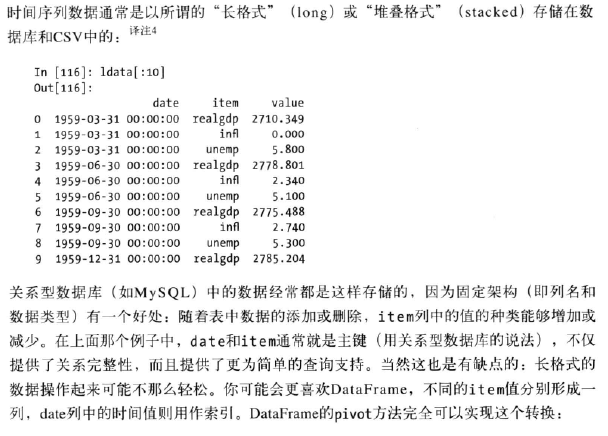

In [59]:
Image(filename="picture\Pivot.png")

In [ ]:
pivoted = ldata.pivot('date', 'item', 'value')

pivoted.head()

In [ ]:
ldata['value2'] = np.random.randn(len(ldata))
ldata[:10]

pivoted = ldata.pivot('date', 'item')
pivoted[:5]
pivoted['value'][:5]

unstacked = ldata.set_index(['date', 'item']).unstack('item')
unstacked[:7]